# What's your (Pokemon) type?
__by Jessica Ngo
<br>March 2018__
## Pokemon Data Exploration
### Data

This dataset includes 721 Pokemon, including their number, name, first and second type, and base stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. 

These base stats are the raw attributes that define the average strengths of a given Pokemon. Also note that this dataset is about the Pokemon games (not pokemon cards or Pokemon Go).

The data has been acquired from several different sites, including pokemon.com, pokemondb.net, and bulbapedia.com.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [2]:
#import dataframe
df = pd.read_csv("Pokemon.csv")

In [3]:
#view column names
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
#view first 5 lines
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The base stats as described by Myles O'Neill, from Kaggle, is:
<br>
#: ID for each pokemon
<br>Name: Name of each Pokemon
<br>Type 1: Each Pokemon has a type that determines weakness/resistance to attacks
<br>Type 2: Some pokemon are dual type and therefore have a second type
<br>Total: sum of all stats that come after this, a general indicator of how strong a Pokemon is
<br>HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
<br>Attack: the base modifier for normal attacks (eg. Scratch, Punch)
<br>Defense: the base damage resistance against normal attacks
<br>SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
<br>SP Def: the base damage resistance against special attacks
<br>Speed: determines which pokemon attacks first each round

Challenges to this dataset involve duplicate numbers under '#' (e.g. # 3 Venusaur and VenusaurMegaVenusaur). These duplicates correspond to Mega Evolutions or stronger, different versions of the same Pokemon. In addition, not every Pokemon will have a dual type (e.g. # 4 Charmander). For our purposes, we will only be focusing on looking at Type 1.

## Analytic Questions
### 1) How many Pokemon are in each Pokemon type? How many Pokemon are in each Generation?

We are starting with a question regarding the frequency of each Pokemon type.

In [5]:
#count of Pokemon by Name
len(df['Name'])

800

There are 800 Pokemon total, including Mega Evolutions.

In [6]:
df['#'].nunique()

721

There are 721 Pokemon total if you exclude the Mega Evolutions.

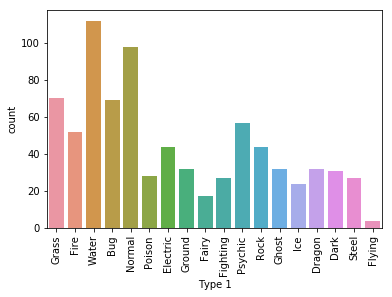

In [7]:
#bar chart of Pokemon by Type 1
#df['Type 1'].value_counts().plot(kind='bar')
sns.countplot(x='Type 1', data=df)
plt.xticks(rotation = 90)
plt.show()

The majority of Pokemon tend to be water types, while the minority tend to be flying. Does this differ by generation?

In [8]:
#pivot table of Type 1 counts by Generation
#pivot_df = pd.pivot_table(df[['Type 1', 'Generation']], index='Type 1', columns='Generation', margins=True, aggfunc=len, fill_value = 0)

pivot_df = pd.pivot_table(df[['Type 1', 'Generation']], index='Generation', columns='Type 1', margins=True, aggfunc=len, fill_value = 0)
pivot_df

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
Generation,,,,,,,,,,,,,,,,,,,
1,14,0,3,9,2,7,14,0,4,13,8,2,24,14,11,10,0,31,166
2,12,6,0,7,5,2,8,0,1,9,3,4,15,1,7,5,3,18,106
3,12,6,12,5,0,5,8,0,5,13,7,7,18,3,12,8,12,27,160
4,10,3,4,12,1,3,5,0,7,15,4,3,18,6,8,6,3,13,121
5,18,13,9,8,0,7,9,2,5,15,10,6,19,2,14,6,4,18,165
6,3,3,4,3,9,3,8,2,10,5,0,2,4,2,5,9,5,5,82
All,69,31,32,44,17,27,52,4,32,70,32,24,98,28,57,44,27,112,800


This pivot table gives us the specific counts of all Pokemon types across generation. The 'All' row shines light on the data given by the Type 1 bar chart. It's obvious here that there is a large number of water types compared to flying types. Though this pivot provides the counts of types across generation, it may be more informative to look at percentages.

In [9]:
#Pivot Table Percentages
pivot_df.div(pivot_df.iloc[:,-1], axis=0).applymap(lambda x: "{0:.0f}%".format(100*x))

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
Generation,,,,,,,,,,,,,,,,,,,
1,8%,0%,2%,5%,1%,4%,8%,0%,2%,8%,5%,1%,14%,8%,7%,6%,0%,19%,100%
2,11%,6%,0%,7%,5%,2%,8%,0%,1%,8%,3%,4%,14%,1%,7%,5%,3%,17%,100%
3,8%,4%,8%,3%,0%,3%,5%,0%,3%,8%,4%,4%,11%,2%,8%,5%,8%,17%,100%
4,8%,2%,3%,10%,1%,2%,4%,0%,6%,12%,3%,2%,15%,5%,7%,5%,2%,11%,100%
5,11%,8%,5%,5%,0%,4%,5%,1%,3%,9%,6%,4%,12%,1%,8%,4%,2%,11%,100%
6,4%,4%,5%,4%,11%,4%,10%,2%,12%,6%,0%,2%,5%,2%,6%,11%,6%,6%,100%
All,9%,4%,4%,6%,2%,3%,6%,0%,4%,9%,4%,3%,12%,4%,7%,6%,3%,14%,100%


In [10]:
#Stacked Bar Chart of Type 1 by Generation
#pivot_df.plot(kind='bar', stacked=True)

With the exception of the 6th generation, Water and Normal types account for more than 10% of types across generations. However, flying types are at 0% up until the 4th generation. Even then, flying types only represent 1% or 2% of types for the 5th and 6th generation respectively. 

_Note that we only examined Type 1. It is possible that flying tends to be more of a secondary type, which would be interesting to investigate further._

### 2) How powerful are these Pokemon? Are there differences by type?

To answer this question, we will look at Total by Type 1.

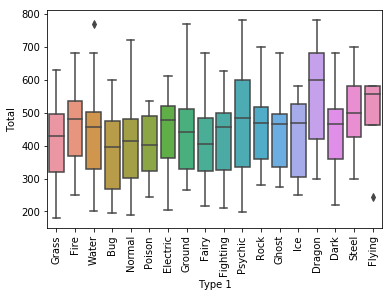

In [11]:
#interquartile range of Total by Type 1
#df.boxplot(column = 'Total', by = 'Type 1' )
#plt.xticks(rotation=90)
#plt.xlabel('Type 1')
#plt.ylabel('Total')
sns.boxplot(x='Type 1', y='Total', data=df)
plt.xticks(rotation=90);

There seems to be an strong outlier for water types and a weak outlier for flying types. However, the lower quartile is highest for flying types. 

The upper whisker is higher for dragon, psychic, and ground types. Could these be due to legendary Pokemon?

### 3) How many Legendary Pokemon are there in relation to all Pokemon? Just how powerful are these Legendary Pokemon?

In [12]:
df['Legendary'].value_counts(sort=True)

False    735
True      65
Name: Legendary, dtype: int64

In [13]:
(65 / 721) * 100

9.015256588072122

Only 65 (9%) of all Pokemon are Legendary. Which generation has more Legendary Pokemon?

In [14]:
#sns.countplot(x='Generation', hue="Legendary", data=df)
#plt.show()

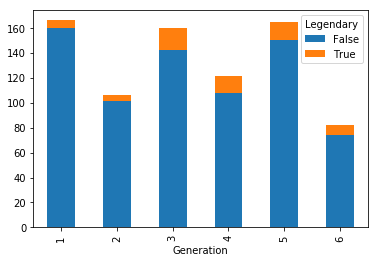

In [15]:
#Stacked Bar Chart of Legendary by Generation
pivot_df2 = pd.pivot_table(df[['Legendary', 'Generation']], index='Generation', columns='Legendary', aggfunc=len, fill_value = 0)
pivot_df2.plot(kind='bar', stacked=True)

There seem to be more legendaries in the 3rd and 5th generations. Are Legendaries more powerful than those that aren't? 

In [16]:
df[['Legendary', 'Total']].groupby('Legendary').describe().transpose()

Legendary         False       True 
Total count  735.000000   65.000000
      mean   417.213605  637.384615
      std    106.760417   60.937389
      min    180.000000  580.000000
      25%    324.000000  580.000000
      50%    425.000000  600.000000
      75%    498.000000  680.000000
      max    700.000000  780.000000

It looks like there's a huge difference between the means, mins, interquartiles ranges, and maxes between Pokemon that are legendary and those that aren't. 

In [17]:
df['Legendary'].corr(df['Total'])

0.5017583833882712

There seems to be a moderate correlation between Legendary Pokemon and Totals.